In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
df=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [26]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [27]:
from imblearn.over_sampling import SMOTE

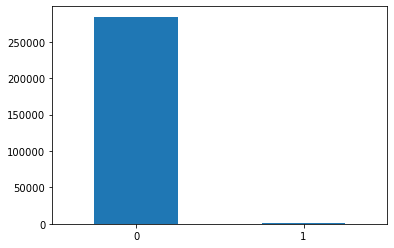

In [28]:
count=pd.value_counts(df['Class'])
count.plot(kind='bar',rot=0)

In [29]:
X=df.drop('Class',axis=1)
y=df['Class']

In [30]:
X_res,y_res=SMOTE().fit_resample(X,y)

In [31]:
X_res.shape

(568630, 30)

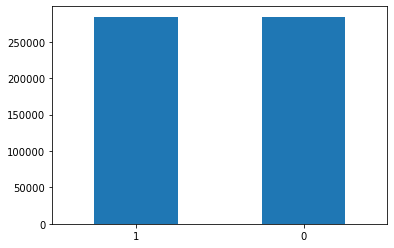

In [32]:
count=pd.value_counts(y_res)
count.plot(kind='bar',rot=0)

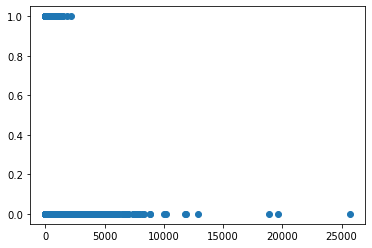

In [33]:
plt.scatter(df['Amount'],df['Class'])

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [35]:
model=RandomForestClassifier(n_estimators=5)

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.20,random_state=0)

In [37]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5)

In [38]:
y_pred=model.predict(X_test)

In [39]:
from sklearn.metrics  import confusion_matrix,accuracy_score

In [40]:
confusion_matrix(y_pred,y_test)

array([[56705,    14],
       [   19, 56988]])

In [41]:
accuracy_score(y_test,y_pred)

0.9997098288869739